In [1]:
from utils import read_images, save_min_projection_imgs, plot_plate, extract_labels, extract_morphology_stats, copy_csv_results, save_summary_stats
from pathlib import Path
from tqdm import tqdm
import pandas as pd

c:\Users\albertds\mambaforge\envs\microglia\lib\site-packages\pyclesperanto_prototype\_tier0\_device.py:77: UserWarning: No OpenCL device found with RTX in their name. Using Intel(R) UHD Graphics 630 instead.
  warnings.warn(f"No OpenCL device found with {name} in their name. Using {device.name} instead.")


In [2]:
# Define your data directory (folder containing the subfolders storing your plate images)
DATA_FOLDER = Path("./data")

# Define the output resolution of your plate plots and username
RESOLUTION = 300
USERNAME = "Gunnar"

# Define your output directory (folder containing the results of the analysis)
OUTPUT_FOLDER = Path("./output")

# Merge results_folder and username into a Path
results_directory = OUTPUT_FOLDER / USERNAME

In [3]:
# Initialize an empty list to store subfolder names
subfolder_list = []

# Iterate over subdirectories in the parent folder
for subfolder in DATA_FOLDER.iterdir():
    if subfolder.is_dir():
        subfolder_list.append(subfolder.name)

100%|██████████| 1/1 [00:08<00:00,  8.45s/it]


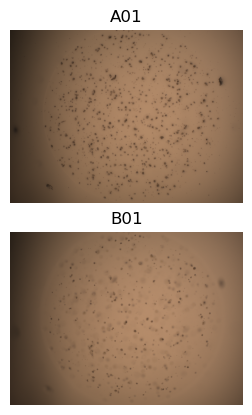

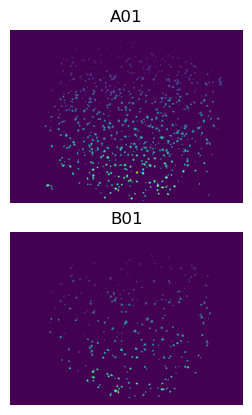

In [4]:
for folder in tqdm(subfolder_list):
    # Build the path containing the input images
    directory_path = DATA_FOLDER.joinpath(folder)
    
    # The following function will read all the images contained within the directory_path above
    # and store them grouped by well_id.
    images_per_well = read_images(directory_path)
    
    # Specify the output directory path to store all resulting output data for this particular plate
    directory = Path(f"./output/{USERNAME}")
    output_directory = directory.joinpath(folder)
    
    # Specify the output directory for minimum intensity projections (MIN_projections)
    min_output_directory = output_directory.joinpath("MIN_projections")
    
    # Perform and save minimum intensity projections
    save_min_projection_imgs(images_per_well, output_dir=min_output_directory)
    
    # Save min_proj plate view
    plot_plate(resolution=RESOLUTION, output_path=f"{output_directory}/{folder}_MIN_proj.tif", img_folder_path=min_output_directory, show_fig=False)
    
    # Specify the output directory for segmented organoids (connected component labels)
    segmentation_output_directory = output_directory.joinpath("labels")
    
    # Segment organoids and store the resulting labels under predictions_output_directory
    extract_labels(input_folder=min_output_directory, output_dir=segmentation_output_directory)
    
    # Save predictions plate view
    plot_plate(resolution=RESOLUTION, output_path=f"{output_directory}/{folder}_predictions.tif", img_folder_path=segmentation_output_directory, show_fig=False, colormap="viridis")
    
    # Extract morphology stats from the labels folder
    all_props_df = extract_morphology_stats(input_folder=segmentation_output_directory)
    
    # Save resulting stats in a .csv file
    all_props_df.to_csv(f"{output_directory}/{folder}.csv", index=False)
    
# Copies .csv files containing per organoid results into a per_organoid_stats folder within results_directory
copy_csv_results(results_directory)

# Save summary stats per plate
save_summary_stats(results_directory)
    